### Base Limpia

In [2]:
import pandas as pd

# Cargar el archivo CSV especificando el delimitador ';'
df_1 = pd.read_excel('Base_Limpia.xlsx')

# Verificar las primeras filas para asegurarte de que se cargó correctamente
print(df_1.head())

   periodo estu_tipodocumento cole_area_ubicacion cole_bilingue  \
0    20224                 TI              URBANO             N   
1    20224                 TI              URBANO             N   
2    20224                 TI              URBANO           NaN   
3    20224                 TI              URBANO             N   
4    20224                 TI              URBANO             N   

  cole_calendario      cole_caracter cole_genero cole_jornada  \
0               A  TÉCNICO/ACADÉMICO       MIXTO       MAÑANA   
1               A            TÉCNICO       MIXTO       MAÑANA   
2               A          ACADÉMICO       MIXTO     COMPLETA   
3               A          ACADÉMICO       MIXTO        UNICA   
4               A  TÉCNICO/ACADÉMICO       MIXTO       MAÑANA   

  cole_mcpio_ubicacion cole_naturaleza  ... fami_tienecomputador  \
0            CHINCHINÁ         OFICIAL  ...                   Si   
1            MANIZALES         OFICIAL  ...                   Si   
2 

In [3]:
# Obtener los nombres de las columnas
columnas1 = df_1.columns.tolist()

# Imprimir la lista de columnas
print(columnas1)

['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario', 'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'cole_sede_principal', 'estu_depto_presentacion', 'estu_depto_reside', 'estu_estadoinvestigacion', 'estu_fechanacimiento', 'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside', 'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad', 'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']


In [4]:
df_1.describe()

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,137572.000000,137564.000000,137572.000000,87300.000000,87300.000000,87093.000000,87093.000000
mean,20157.917898,48.341327,49.067394,49.083792,50.295418,52.122719,252.402030
std,39.315164,11.460042,11.656399,11.311883,10.275440,10.007419,48.526775
min,20101.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20122.000000,41.000000,41.000000,41.000000,43.000000,45.000000,217.000000
50%,20152.000000,46.000000,49.000000,49.000000,50.000000,52.000000,248.000000
75%,20194.000000,54.000000,56.000000,57.000000,57.000000,59.000000,285.000000
max,20224.000000,117.290000,113.640000,100.000000,100.000000,100.000000,471.000000


Pregunta 1: ¿Cuáles características influyen para que los estudiantes tengan un resultado de puntaje global mayor a 300 puntos en la prueba Saber 11, en el departamento de Caldas?  

Pregunta 2: ¿Qué factores influyen más en el desempeño de los estudiantes del departamento de Caldas con relación al puntaje global que obtienen en la prueba Saber 11? 

In [5]:
import seaborn as sns
%matplotlib inline
# Lista de columnas que quieres seleccionar
columnas_seleccionadas = ['estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue','cole_calendario','cole_caracter','estu_genero',  'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda','fami_tienecomputador', 'fami_tieneinternet', 'desemp_ingles', 'punt_global' ]

# Crear un nuevo dataset con solo esas columnas
df_P1 = df_1[columnas_seleccionadas]

# Mostrar las primeras filas del nuevo dataset
print(df_P1.head())

  estu_tipodocumento cole_area_ubicacion cole_bilingue cole_calendario  \
0                 TI              URBANO             N               A   
1                 TI              URBANO             N               A   
2                 TI              URBANO           NaN               A   
3                 TI              URBANO             N               A   
4                 TI              URBANO             N               A   

       cole_caracter estu_genero                 fami_educacionmadre  \
0  TÉCNICO/ACADÉMICO           M                 Primaria incompleta   
1            TÉCNICO           F      Técnica o tecnológica completa   
2          ACADÉMICO           F                           Postgrado   
3          ACADÉMICO           F  Secundaria (Bachillerato) completa   
4  TÉCNICO/ACADÉMICO           F                 Primaria incompleta   

                  fami_educacionpadre fami_estratovivienda  \
0                             No sabe            Estrato 2  

Histogramas de Frecuencias

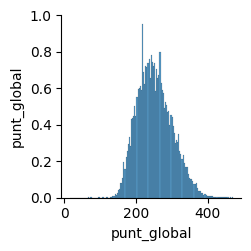

In [6]:
sns.pairplot(df_P1,)

La mayoria de los datos se centran entre 250 y 300 puntos, siguiendo una distribucion parecida a una campana de Gauss


Boxplots y Pie Charts para Analizar Variables Categoricas y Binarias

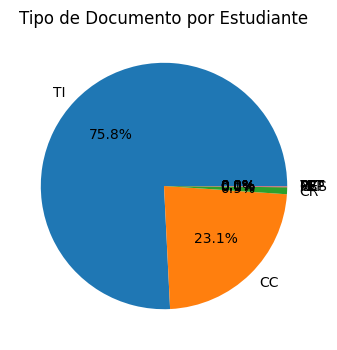

In [7]:
import matplotlib.pyplot as plt
df_P1['estu_tipodocumento'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Tipo de Documento por Estudiante')
plt.ylabel('')
plt.show()

In [8]:
unique_categories = df_P1['estu_tipodocumento'].unique()
unique_categories


array(['TI', 'PEP', 'CR', 'CC', 'NES', 'CE', 'PV', 'PE', 'PPT', 'PC', 'V'],
      dtype=object)

In [9]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos = df_P1['estu_tipodocumento'].value_counts()

# Mostrar los conteos
print("--- Conteos de estu_tipodocumento ---")
print(conteos)

--- Conteos de estu_tipodocumento ---
estu_tipodocumento
TI     104265
CC      31835
CR       1243
CE        130
PEP        38
NES        36
PPT         8
PC          7
PE          5
PV          4
V           1
Name: count, dtype: int64


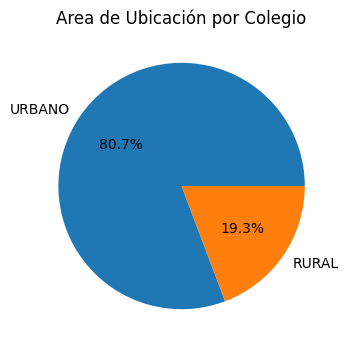

In [10]:
df_P1['cole_area_ubicacion'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Area de Ubicación por Colegio')
plt.ylabel('')
plt.show()

In [11]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['cole_area_ubicacion'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
cole_area_ubicacion
URBANO    111079
RURAL      26493
Name: count, dtype: int64


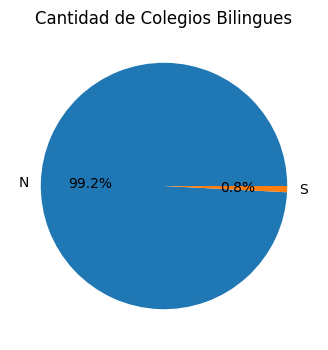

In [12]:
df_P1['cole_bilingue'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Cantidad de Colegios Bilingues')
plt.ylabel('')
plt.show()

In [13]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['cole_bilingue'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
cole_bilingue
N    123880
S      1015
Name: count, dtype: int64


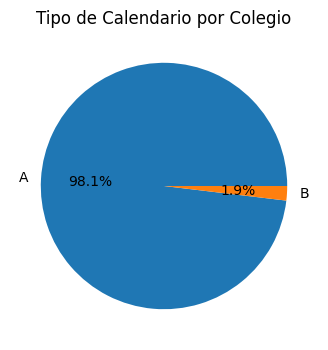

In [14]:
df_P1['cole_calendario'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Tipo de Calendario por Colegio')
plt.ylabel('')
plt.show()

In [15]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['cole_calendario'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
cole_calendario
A    134968
B      2604
Name: count, dtype: int64


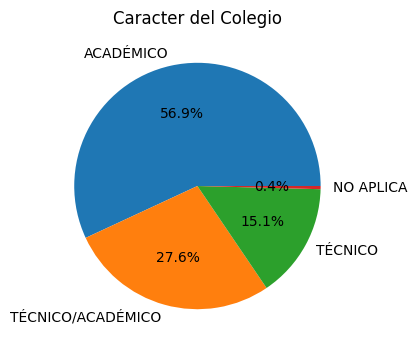

In [17]:
df_P1['cole_caracter'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Caracter del Colegio')
plt.ylabel('')
plt.show()

In [18]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['cole_caracter'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
cole_caracter
ACADÉMICO            77865
TÉCNICO/ACADÉMICO    37712
TÉCNICO              20663
NO APLICA              567
Name: count, dtype: int64


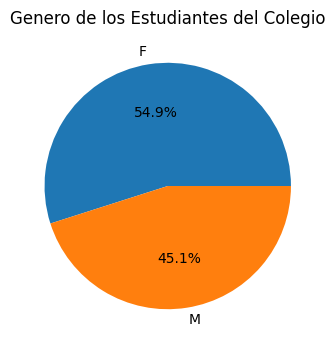

In [19]:
df_P1['estu_genero'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Genero de los Estudiantes del Colegio')
plt.ylabel('')
plt.show()

In [20]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['estu_genero'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
estu_genero
F    75520
M    61979
Name: count, dtype: int64


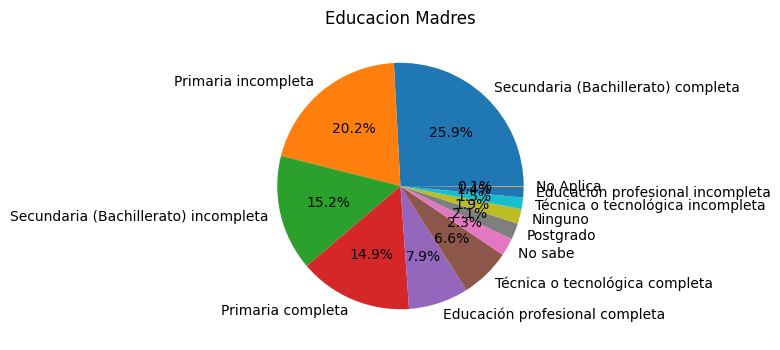

In [21]:
df_P1['fami_educacionmadre'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Educacion Madres')
plt.ylabel('')
plt.show()

In [22]:
unique_categories = df_P1['fami_educacionmadre'].unique()
unique_categories

array(['Primaria incompleta', 'Técnica o tecnológica completa',
       'Postgrado', 'Secundaria (Bachillerato) completa',
       'Secundaria (Bachillerato) incompleta', nan, 'Ninguno',
       'Educación profesional completa', 'Primaria completa', 'No sabe',
       'Educación profesional incompleta',
       'Técnica o tecnológica incompleta', 'No Aplica'], dtype=object)

In [23]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['fami_educacionmadre'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
fami_educacionmadre
Secundaria (Bachillerato) completa      34488
Primaria incompleta                     26951
Secundaria (Bachillerato) incompleta    20259
Primaria completa                       19819
Educación profesional completa          10506
Técnica o tecnológica completa           8783
No sabe                                  3123
Postgrado                                2863
Ninguno                                  2582
Técnica o tecnológica incompleta         2006
Educación profesional incompleta         1866
No Aplica                                 134
Name: count, dtype: int64


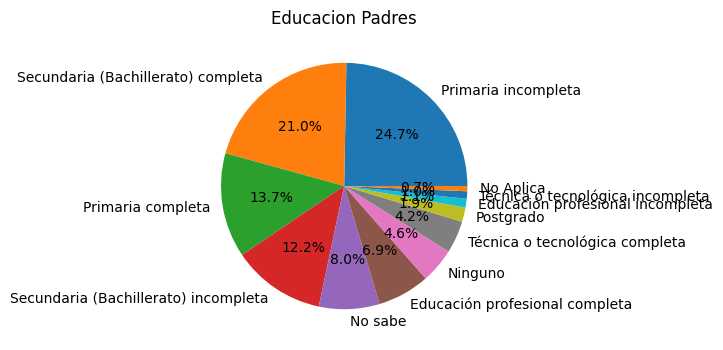

In [24]:
df_P1['fami_educacionpadre'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Educacion Padres')
plt.ylabel('')
plt.show()

In [25]:
unique_categories = df_P1['fami_educacionpadre'].unique()
unique_categories

array(['No sabe', 'Secundaria (Bachillerato) completa', 'Postgrado',
       'Ninguno', 'Primaria incompleta', 'Técnica o tecnológica completa',
       nan, 'Primaria completa', 'Educación profesional incompleta',
       'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional completa', 'No Aplica'], dtype=object)

In [26]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['fami_educacionpadre'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
fami_educacionpadre
Primaria incompleta                     32971
Secundaria (Bachillerato) completa      28018
Primaria completa                       18317
Secundaria (Bachillerato) incompleta    16322
No sabe                                 10609
Educación profesional completa           9154
Ninguno                                  6111
Técnica o tecnológica completa           5642
Postgrado                                2523
Educación profesional incompleta         1522
Técnica o tecnológica incompleta         1297
No Aplica                                 914
Name: count, dtype: int64


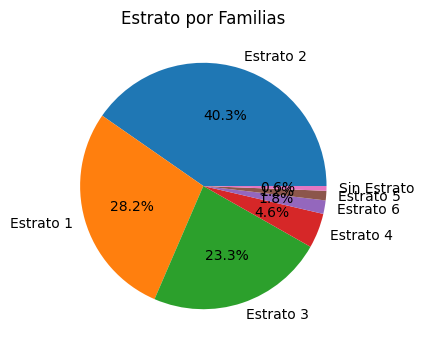

In [27]:
df_P1['fami_estratovivienda'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Estrato por Familias')
plt.ylabel('')
plt.show()

In [28]:
# Contar los datos por categoría en la columna 'estu_tipodocumento'
conteos2 = df_P1['fami_estratovivienda'].value_counts()

# Mostrar los conteos
print("--- Conte por Categorias ---")
print(conteos2)

--- Conte por Categorias ---
fami_estratovivienda
Estrato 2      54018
Estrato 1      37766
Estrato 3      31163
Estrato 4       6125
Estrato 6       2369
Estrato 5       1670
Sin Estrato      838
Name: count, dtype: int64


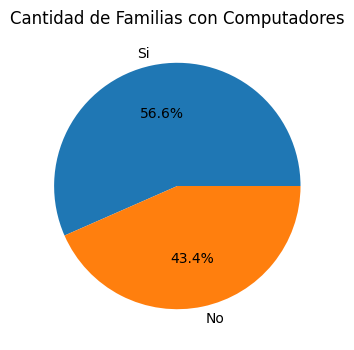

In [29]:
df_P1['fami_tienecomputador'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Cantidad de Familias con Computadores')
plt.ylabel('')
plt.show()

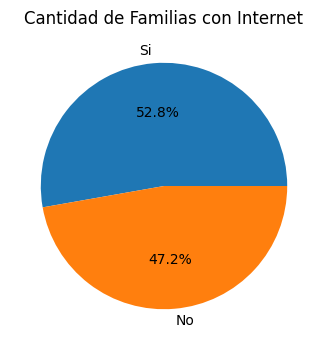

In [30]:
df_P1['fami_tieneinternet'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Cantidad de Familias con Internet')
plt.ylabel('')
plt.show()

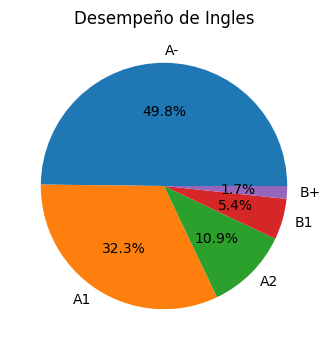

In [31]:
df_P1['desemp_ingles'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Desempeño de Ingles')
plt.ylabel('')
plt.show()

Histogramas

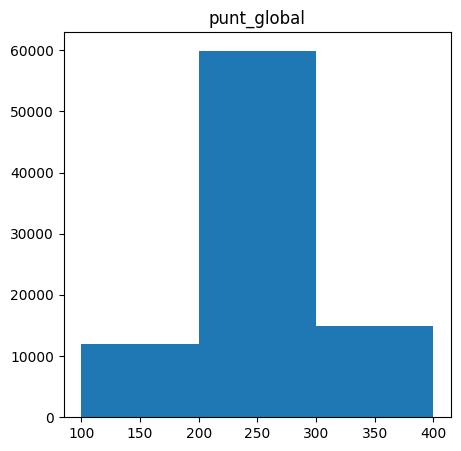

In [33]:
#Puntaje Global
bin_edges = [100, 200, 300, 400]
plt.figure(figsize = (5, 5))
plt.hist(df_1['punt_global'], bins = bin_edges)
plt.title('punt_global')
plt.show()

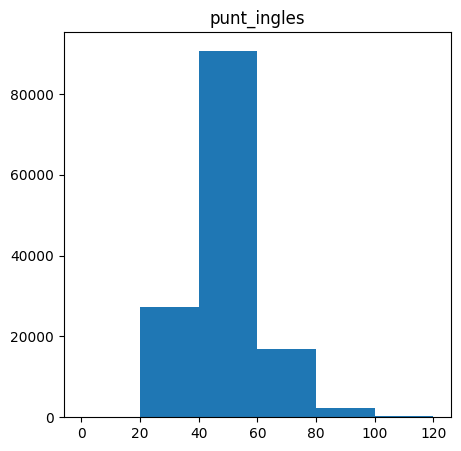

In [ ]:
# Puntaje Ingles
bin_edges = [0, 20, 40, 60, 80, 100, 120]
plt.figure(figsize = (5, 5))
plt.hist(df_1['punt_ingles'], bins = bin_edges)
plt.title('punt_ingles')
plt.show()

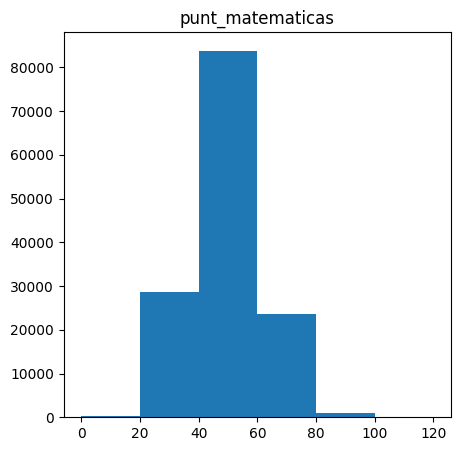

In [35]:
# Puntaje Matematicas
bin_edges = [0, 20, 40, 60, 80, 100, 120]
plt.figure(figsize = (5, 5))
plt.hist(df_1['punt_matematicas'], bins = bin_edges)
plt.title('punt_matematicas')
plt.show()

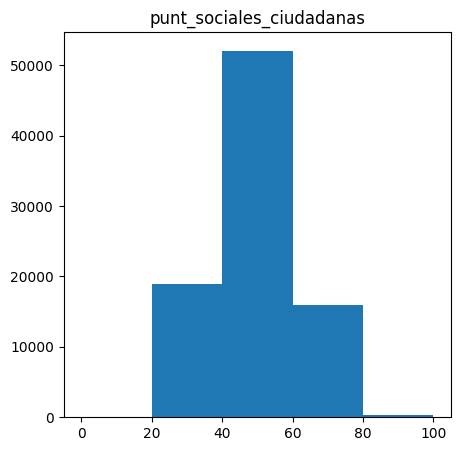

In [ ]:
# Puntaje Sociales y Ciudadanas
bin_edges = [0, 20, 40, 60, 80, 100]
plt.figure(figsize = (5, 5))
plt.hist(df_1['punt_sociales_ciudadanas'], bins = bin_edges)
plt.title('punt_sociales_ciudadanas')
plt.show()

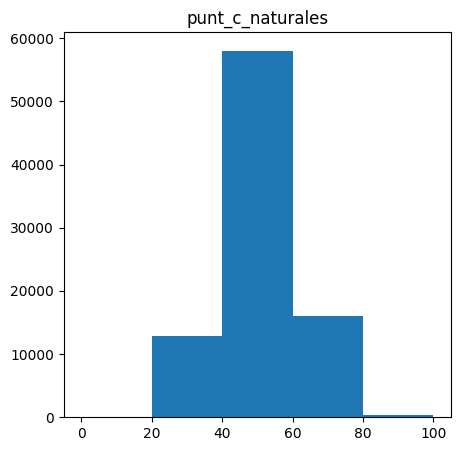

In [ ]:
# Puntaje Ciencias Naturales
bin_edges = [0, 20, 40, 60, 80, 100]
plt.figure(figsize = (5, 5))
plt.hist(df_1['punt_c_naturales'], bins = bin_edges)
plt.title('punt_c_naturales')
plt.show()

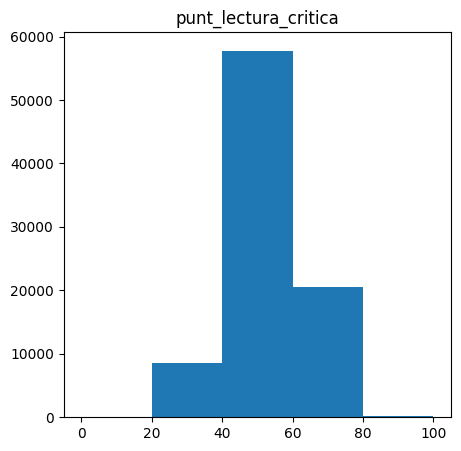

In [40]:
# Puntaje Lectura Critica
bin_edges = [0, 20, 40, 60, 80, 100]
plt.figure(figsize = (5, 5))
plt.hist(df_1['punt_lectura_critica'], bins = bin_edges)
plt.title('punt_lectura_critica')
plt.show()

Relacion de las Variables Numericas con la Variable Objetivo


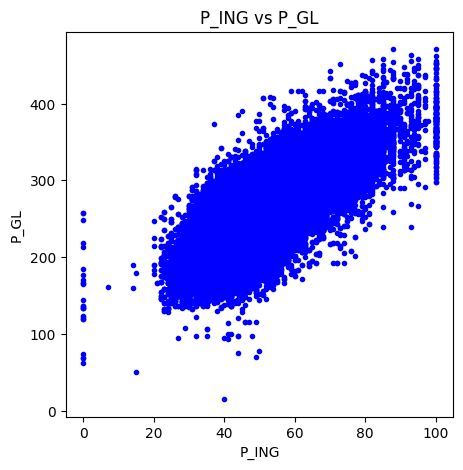

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(df_1['punt_ingles'], df_1['punt_global'], '.', color = 'blue')
plt.title('P_ING vs P_GL')
plt.xlabel('P_ING')
plt.ylabel('P_GL')
plt.show()



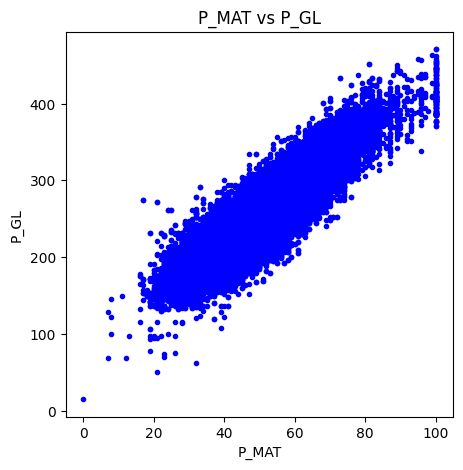

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(df_1['punt_matematicas'], df_1['punt_global'], '.', color = 'blue')
plt.title('P_MAT vs P_GL')
plt.xlabel('P_MAT')
plt.ylabel('P_GL')
plt.show()



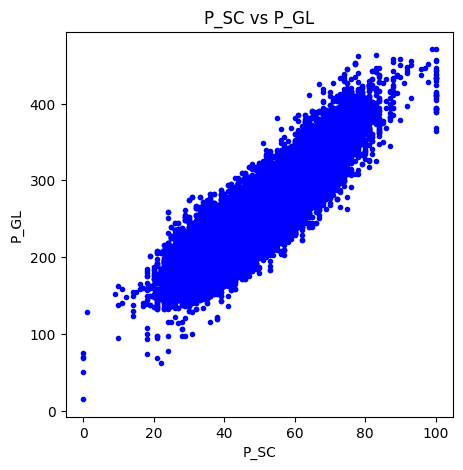

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(df_1['punt_sociales_ciudadanas'], df_1['punt_global'], '.', color = 'blue')
plt.title('P_SC vs P_GL')
plt.xlabel('P_SC')
plt.ylabel('P_GL')
plt.show()



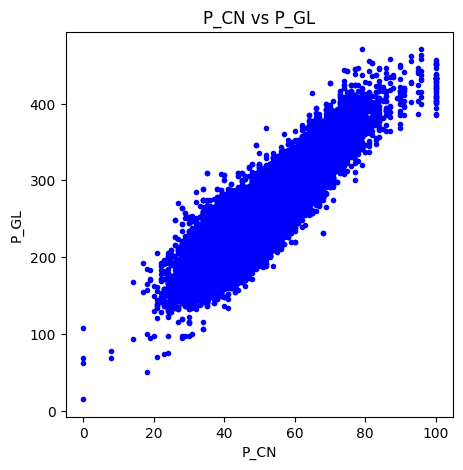

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(df_1['punt_c_naturales'], df_1['punt_global'], '.', color = 'blue')
plt.title('P_CN vs P_GL')
plt.xlabel('P_CN')
plt.ylabel('P_GL')
plt.show()



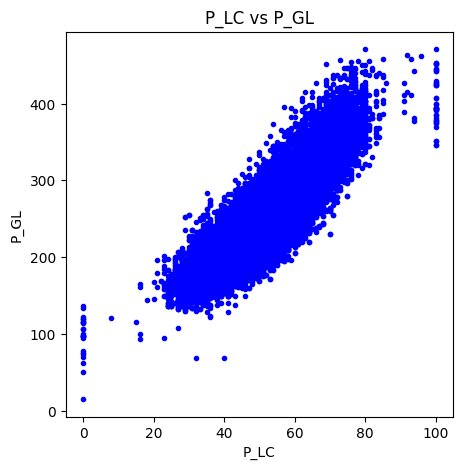

In [45]:
plt.figure(figsize = (5, 5))
plt.plot(df_1['punt_lectura_critica'], df_1['punt_global'], '.', color = 'blue')
plt.title('P_LC vs P_GL')
plt.xlabel('P_LC')
plt.ylabel('P_GL')
plt.show()

Box Plots para las Variables Categoricas

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\3699584077.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


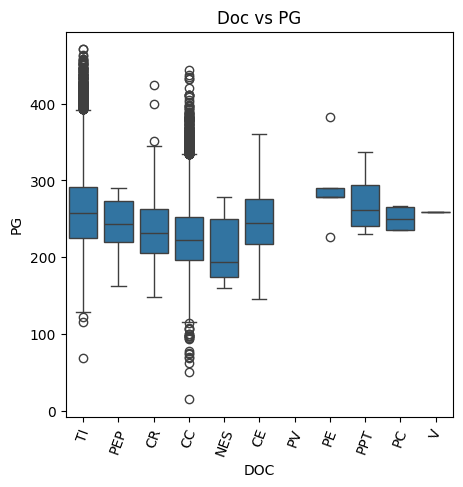

In [113]:
fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'estu_tipodocumento', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('Doc vs PG')
plt.xlabel('DOC')
plt.ylabel('PG')
plt.show()



C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\1622810009.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


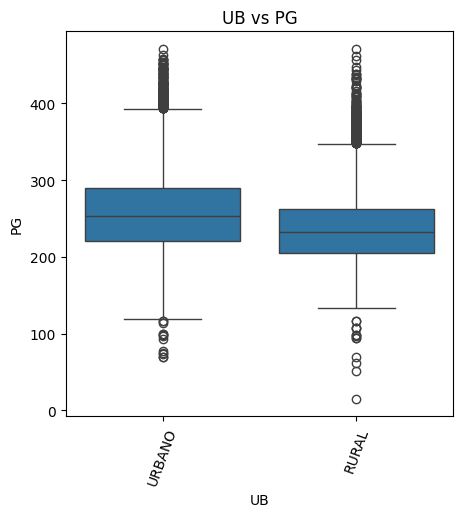

In [114]:
fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'cole_area_ubicacion', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('UB vs PG')
plt.xlabel('UB')
plt.ylabel('PG')
plt.show()



C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\2168542362.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


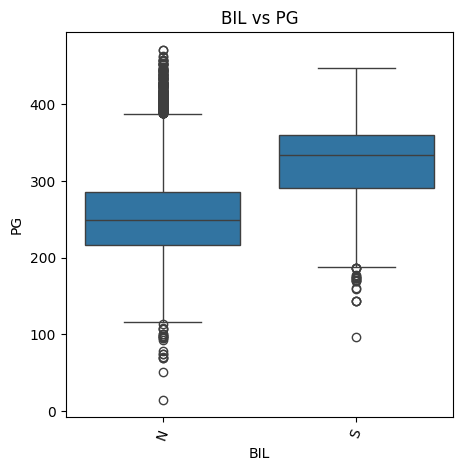

In [115]:

fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'cole_bilingue', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('BIL vs PG')
plt.xlabel('BIL')
plt.ylabel('PG')
plt.show()


C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\536681695.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


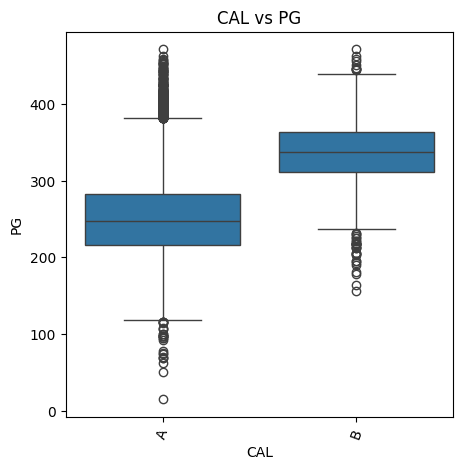

In [116]:


fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'cole_calendario', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('CAL vs PG')
plt.xlabel('CAL')
plt.ylabel('PG')
plt.show()


C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\3569948493.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


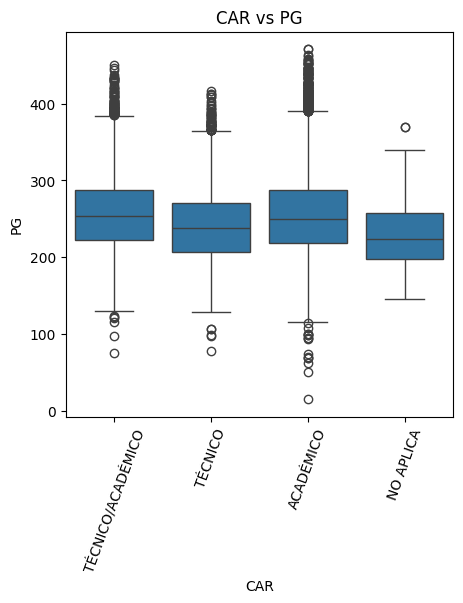

In [117]:



fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'cole_caracter', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('CAR vs PG')
plt.xlabel('CAR')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\3984834113.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


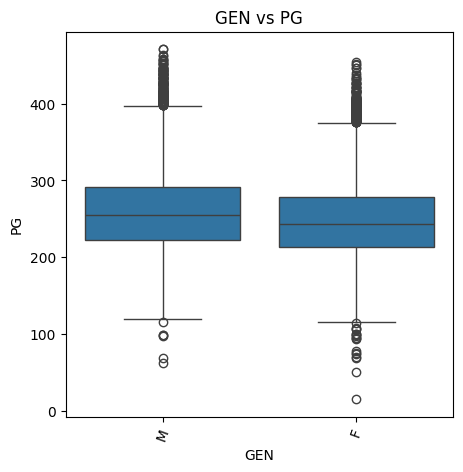

In [118]:


fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'estu_genero', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('GEN vs PG')
plt.xlabel('GEN')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\1946319154.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


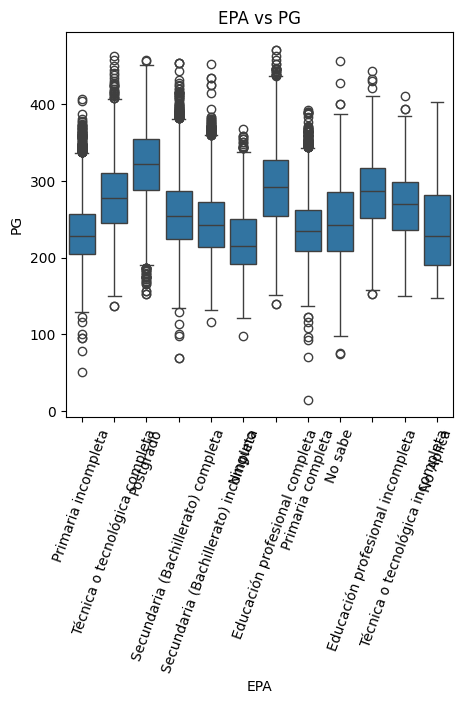

In [119]:


fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'fami_educacionmadre', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('EPA vs PG')
plt.xlabel('EPA')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\3707838847.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


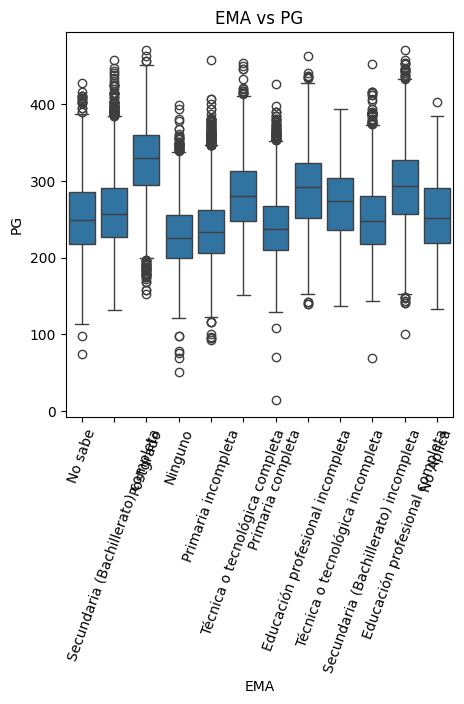

In [120]:

fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'fami_educacionpadre', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('EMA vs PG')
plt.xlabel('EMA')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\3027645505.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


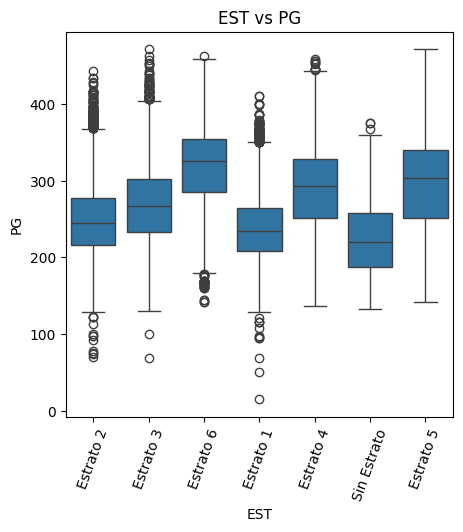

In [121]:

fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'fami_estratovivienda', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('EST vs PG')
plt.xlabel('EST')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\306909154.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


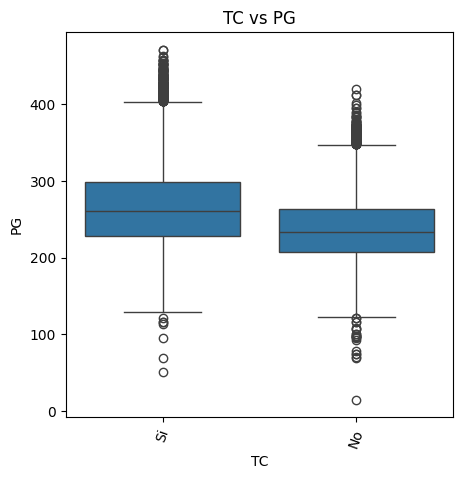

In [122]:

fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'fami_tienecomputador', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('TC vs PG')
plt.xlabel('TC')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\1723220705.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


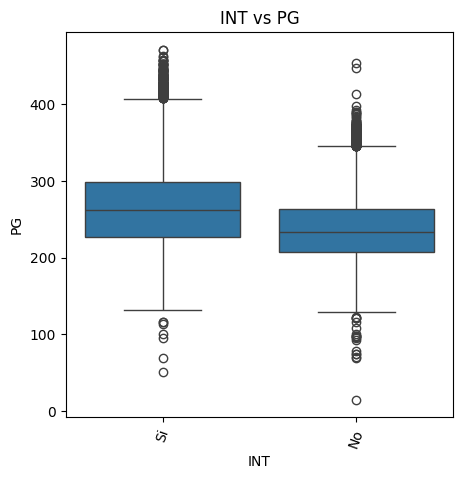

In [123]:
fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'fami_tieneinternet', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('INT vs PG')
plt.xlabel('INT')
plt.ylabel('PG')
plt.show()

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_22656\2496026744.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


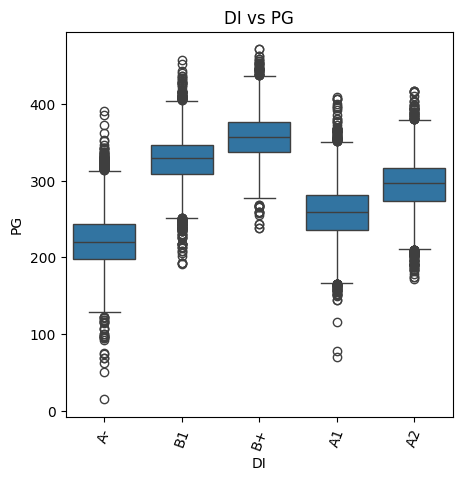

In [124]:
fig = plt.figure(figsize=(5, 5))
ax = sns.boxplot(x = 'desemp_ingles', y = 'punt_global', data = df_P1)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('DI vs PG')
plt.xlabel('DI')
plt.ylabel('PG')
plt.show()

### Base con las Dummies

In [59]:
df_1 = pd.read_excel('Base_Limpia.xlsx')

In [60]:
import pandas as pd

# Suponiendo que 'df_1' ya está cargado, convertir las columnas categóricas en dummies
columnas_a_convertir = [
    'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
    'cole_calendario', 'cole_caracter', 'cole_genero', 'cole_jornada',
    'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento',
    'cole_nombre_sede', 'cole_sede_principal', 'estu_depto_presentacion',
    'estu_depto_reside', 'estu_estadoinvestigacion', 'estu_genero',
    'estu_mcpio_presentacion', 'estu_mcpio_reside', 'estu_nacionalidad',
    'estu_pais_reside', 'estu_privado_libertad', 'fami_cuartoshogar',
    'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
    'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
    'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles'
]

# Convertir a dummies y crear un nuevo DataFrame
df_dummies = pd.get_dummies(df_1[columnas_a_convertir], drop_first=True)


# Combinar df_1 con las columnas de dummies
df_final = pd.concat([df_1.drop(columns=columnas_a_convertir), df_dummies], axis=1)

# Mostrar el DataFrame final
print("Columnas en df_final:")
print(df_final.columns)

Columnas en df_final:
Index(['periodo', 'estu_fechanacimiento', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global', 'estu_tipodocumento_CE', 'estu_tipodocumento_CR',
       ...
       'fami_personashogar_Tres', 'fami_personashogar_Una',
       'fami_tieneautomovil_Si', 'fami_tienecomputador_Si',
       'fami_tieneinternet_Si', 'fami_tienelavadora_Si', 'desemp_ingles_A1',
       'desemp_ingles_A2', 'desemp_ingles_B+', 'desemp_ingles_B1'],
      dtype='object', length=1110)


In [49]:
# Filtrar las columnas que comienzan con 'estu_tipodocumento'
columnas_dummies = [col for col in df_dummies.columns if col.startswith('estu_tipodocumento')]

# Imprimir las columnas filtradas
print("Columnas dummies que comienzan con 'estu_tipodocumento':")
print(columnas_dummies)

Columnas dummies que comienzan con 'estu_tipodocumento':
['estu_tipodocumento_CE', 'estu_tipodocumento_CR', 'estu_tipodocumento_NES', 'estu_tipodocumento_PC', 'estu_tipodocumento_PE', 'estu_tipodocumento_PEP', 'estu_tipodocumento_PPT', 'estu_tipodocumento_PV', 'estu_tipodocumento_TI', 'estu_tipodocumento_V']


In [73]:
# Filtrar las columnas que comienzan con 'estu_tipodocumento'
columnas_dummies = [col for col in df_dummies.columns if col.__contains__('desemp_ingles')]

# Imprimir las columnas filtradas
print("Columnas dummies que comienzan con 'estu_tipodocumento':")
print(columnas_dummies)

Columnas dummies que comienzan con 'estu_tipodocumento':
['desemp_ingles_A1', 'desemp_ingles_A2', 'desemp_ingles_B+', 'desemp_ingles_B1']


In [75]:
# Lista de columnas que quieres seleccionar
col1 = ['estu_tipodocumento_CE', 'estu_tipodocumento_CR', 'estu_tipodocumento_NES', 'estu_tipodocumento_PC', 'estu_tipodocumento_PE', 'estu_tipodocumento_PEP', 'estu_tipodocumento_PPT', 'estu_tipodocumento_PV', 'estu_tipodocumento_TI', 'estu_tipodocumento_V', 'cole_area_ubicacion_URBANO', 'cole_bilingue_S','cole_calendario_B','cole_caracter_NO APLICA', 'cole_caracter_TÉCNICO', 'cole_caracter_TÉCNICO/ACADÉMICO','estu_genero_M', 'fami_educacionmadre_Educación profesional incompleta', 'fami_educacionmadre_Ninguno', 'fami_educacionmadre_No Aplica', 'fami_educacionmadre_No sabe', 'fami_educacionmadre_Postgrado', 'fami_educacionmadre_Primaria completa', 'fami_educacionmadre_Primaria incompleta', 'fami_educacionmadre_Secundaria (Bachillerato) completa', 'fami_educacionmadre_Secundaria (Bachillerato) incompleta', 'fami_educacionmadre_Técnica o tecnológica completa', 'fami_educacionmadre_Técnica o tecnológica incompleta', 'fami_educacionpadre_Educación profesional incompleta', 'fami_educacionpadre_Ninguno', 'fami_educacionpadre_No Aplica', 'fami_educacionpadre_No sabe', 'fami_educacionpadre_Postgrado', 'fami_educacionpadre_Primaria completa', 'fami_educacionpadre_Primaria incompleta', 'fami_educacionpadre_Secundaria (Bachillerato) completa', 'fami_educacionpadre_Secundaria (Bachillerato) incompleta', 'fami_educacionpadre_Técnica o tecnológica completa', 'fami_educacionpadre_Técnica o tecnológica incompleta', 'fami_estratovivienda_Estrato 2', 'fami_estratovivienda_Estrato 3', 'fami_estratovivienda_Estrato 4', 'fami_estratovivienda_Estrato 5', 'fami_estratovivienda_Estrato 6', 'fami_estratovivienda_Sin Estrato','fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'desemp_ingles_A1', 'desemp_ingles_A2', 'desemp_ingles_B+', 'desemp_ingles_B1', 'punt_lectura_critica', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales','punt_global' ]


Analisis de Variables


### Matriz de Autocorrelación

In [76]:
# Calcular la matriz de correlación sin incluir 'estu_fechanacimiento'
correlation_matrix = df_final[col1].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación (sin 'estu_fechanacimiento'):")
print(correlation_matrix)

Matriz de correlación (sin 'estu_fechanacimiento'):
                                                    estu_tipodocumento_CE  \
estu_tipodocumento_CE                                            1.000000   
estu_tipodocumento_CR                                           -0.002937   
estu_tipodocumento_NES                                          -0.000498   
estu_tipodocumento_PC                                           -0.000219   
estu_tipodocumento_PE                                           -0.000185   
estu_tipodocumento_PEP                                          -0.000511   
estu_tipodocumento_PPT                                          -0.000235   
estu_tipodocumento_PV                                           -0.000166   
estu_tipodocumento_TI                                           -0.054414   
estu_tipodocumento_V                                            -0.000083   
cole_area_ubicacion_URBANO                                      -0.008378   
cole_bilingue_S         

In [83]:
import pandas as pd

# Supongamos que 'correlation_matrix' ya está calculada
# Filtrar las correlaciones con la variable objetivo 'punt_global'
target_correlations = correlation_matrix['punt_global'].reset_index()
target_correlations.columns = ['Variable', 'Correlación']

# Filtrar solo valores mayores a 0.8 o menores a -0.8
strong_target_correlations = target_correlations[
    (target_correlations['Correlación'] > 0.25) | (target_correlations['Correlación'] < -0.25)
]

# Excluir 'punt_global' en sí misma (correlación consigo misma es siempre 1)
strong_target_correlations = strong_target_correlations[
    strong_target_correlations['Variable'] != 'punt_global'
]

# Imprimir los resultados
print("Variables con correlación fuerte con 'punt_global':")
print(strong_target_correlations)


Variables con correlación fuerte con 'punt_global':
                    Variable  Correlación
8      estu_tipodocumento_TI     0.285051
45   fami_tienecomputador_Si     0.282266
46     fami_tieneinternet_Si     0.280489
48          desemp_ingles_A2     0.340840
49          desemp_ingles_B+     0.305043
50          desemp_ingles_B1     0.401862
51      punt_lectura_critica     0.887163
52               punt_ingles     0.771768
53          punt_matematicas     0.900146
54  punt_sociales_ciudadanas     0.903188
55          punt_c_naturales     0.910238


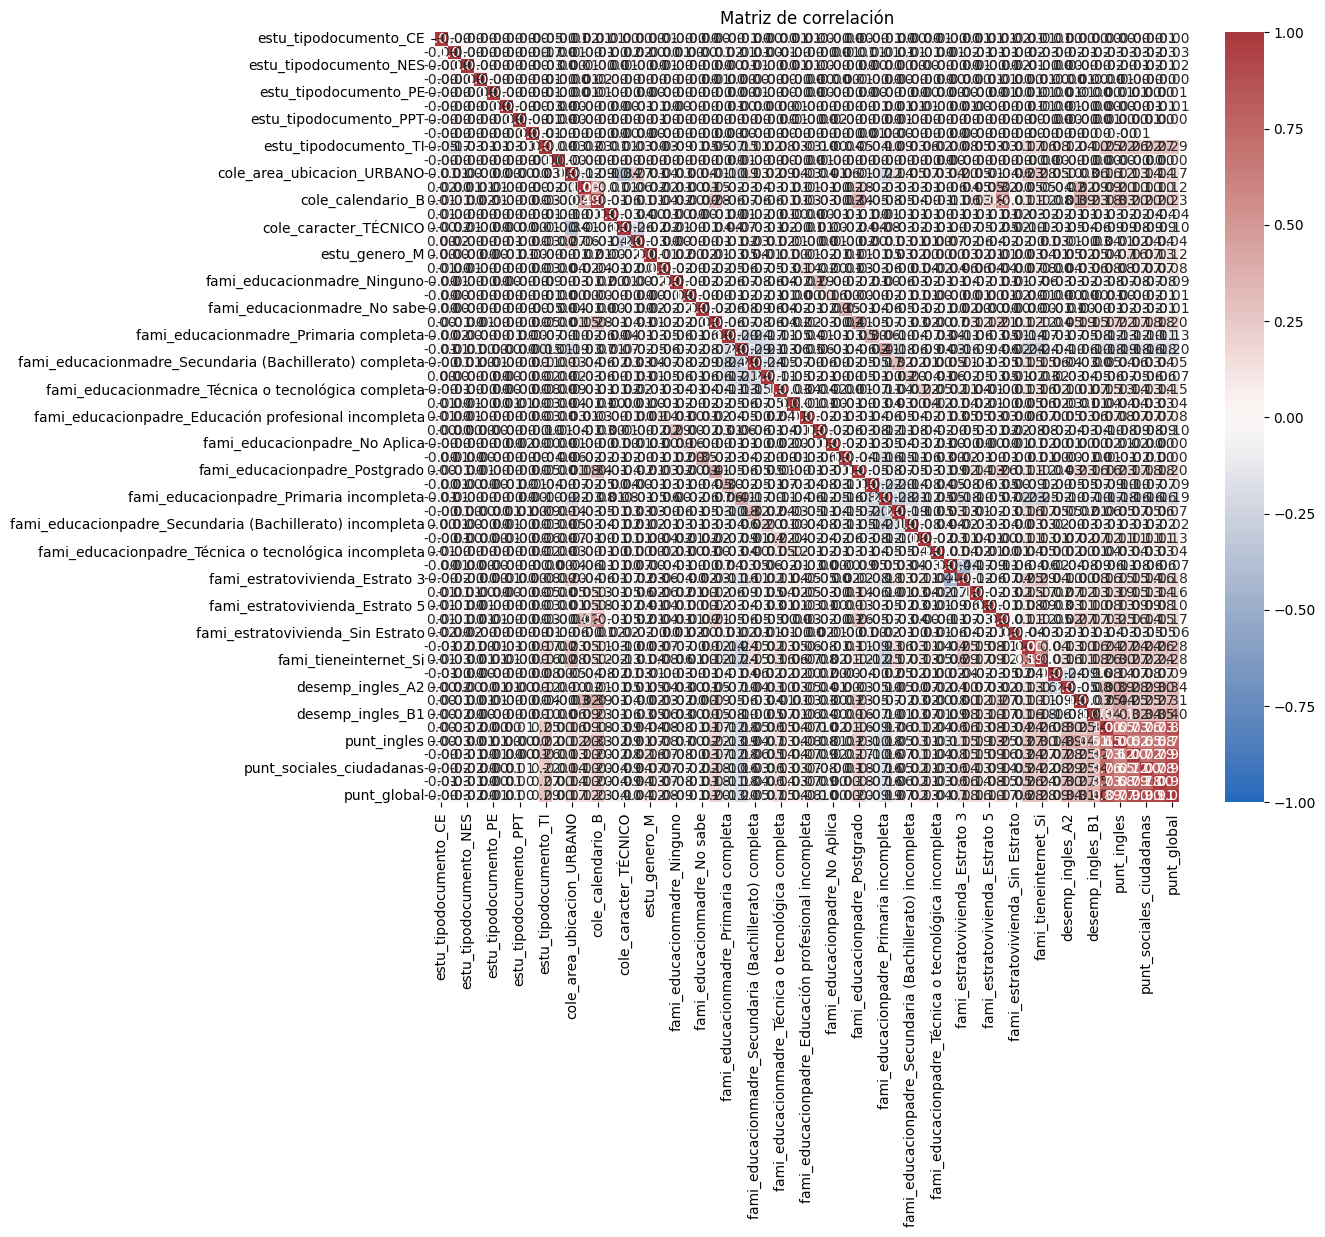

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'correlation_matrix' ya está calculada
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(
    correlation_matrix, 
    cmap='vlag',        # Paleta de colores (azul-rojo)
    annot=True,         # Mostrar los valores de las correlaciones
    fmt=".2f",          # Formato de los números
    vmin=-1, vmax=1     # Escala de la correlación (-1 a 1)
)

# Título del gráfico
plt.title("Matriz de correlación")
plt.show()


In [86]:
# Obtener la lista de variables
variable_list = strong_target_correlations['Variable'].tolist()

# Imprimir la lista de variables
print(variable_list)

['estu_tipodocumento_TI', 'fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'desemp_ingles_A2', 'desemp_ingles_B+', 'desemp_ingles_B1', 'punt_lectura_critica', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales']


In [87]:
# Calcular la matriz de correlación sin incluir 'estu_fechanacimiento'
correlation_matrix = df_final[variable_list].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación (sin 'estu_fechanacimiento'):")
print(correlation_matrix)

Matriz de correlación (sin 'estu_fechanacimiento'):
                          estu_tipodocumento_TI  fami_tienecomputador_Si  \
estu_tipodocumento_TI                  1.000000                 0.173263   
fami_tienecomputador_Si                0.173263                 1.000000   
fami_tieneinternet_Si                  0.160792                 0.591025   
desemp_ingles_A2                       0.115644                 0.127430   
desemp_ingles_B+                       0.037483                 0.104491   
desemp_ingles_B1                       0.098011                 0.156866   
punt_lectura_critica                   0.254465                 0.235984   
punt_ingles                            0.221582                 0.269964   
punt_matematicas                       0.261462                 0.240424   
punt_sociales_ciudadanas               0.216954                 0.240187   
punt_c_naturales                       0.266388                 0.258798   

                          fami_tien

In [89]:
import pandas as pd

# Supongamos que 'correlation_matrix' ya está calculada
# Filtrar las correlaciones mayores a 0.7 o menores a -0.7
correlated_pairs = correlation_matrix.stack().reset_index()
correlated_pairs.columns = ['Variable_1', 'Variable_2', 'Correlación']

# Filtrar solo los pares con correlaciones fuertes y evitar duplicados (manteniendo solo pares únicos)
strong_correlations = correlated_pairs[
    ((correlated_pairs['Correlación'] > 0.7) | (correlated_pairs['Correlación'] < -0.7)) &
    (correlated_pairs['Variable_1'] != correlated_pairs['Variable_2'])
].drop_duplicates(subset=['Correlación'])

# Imprimir los resultados
print("Pares de variables con correlaciones mayores a 0.8 o menores a -0.8:")
print(strong_correlations)


Pares de variables con correlaciones mayores a 0.8 o menores a -0.8:
                   Variable_1                Variable_2  Correlación
74       punt_lectura_critica          punt_matematicas     0.730319
75       punt_lectura_critica  punt_sociales_ciudadanas     0.764376
76       punt_lectura_critica          punt_c_naturales     0.732564
97           punt_matematicas  punt_sociales_ciudadanas     0.720863
98           punt_matematicas          punt_c_naturales     0.785345
109  punt_sociales_ciudadanas          punt_c_naturales     0.777406


In [98]:
variable_list.remove('punt_lectura_critica')

ValueError: list.remove(x): x not in list

In [ ]:
# Verificar si la variable está en la lista y eliminarla
variable_list.remove('punt_matematicas')



ValueError: list.remove(x): x not in list

In [106]:
# Verificar si la variable está en la lista y eliminarla
variable_list.remove('punt_sociales_ciudadanas')

In [107]:
# Imprimir la lista actualizada
print("Lista actualizada de variables:")
print(variable_list)

# Calcular la matriz de correlación sin incluir 'estu_fechanacimiento'
correlation_matrix = df_final[variable_list].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación (sin 'estu_fechanacimiento'):")
print(correlation_matrix)

Lista actualizada de variables:
['estu_tipodocumento_TI', 'fami_tienecomputador_Si', 'fami_tieneinternet_Si', 'desemp_ingles_A2', 'desemp_ingles_B+', 'desemp_ingles_B1', 'punt_ingles', 'punt_c_naturales']
Matriz de correlación (sin 'estu_fechanacimiento'):
                         estu_tipodocumento_TI  fami_tienecomputador_Si  \
estu_tipodocumento_TI                 1.000000                 0.173263   
fami_tienecomputador_Si               0.173263                 1.000000   
fami_tieneinternet_Si                 0.160792                 0.591025   
desemp_ingles_A2                      0.115644                 0.127430   
desemp_ingles_B+                      0.037483                 0.104491   
desemp_ingles_B1                      0.098011                 0.156866   
punt_ingles                           0.221582                 0.269964   
punt_c_naturales                      0.266388                 0.258798   

                         fami_tieneinternet_Si  desemp_ingles_A2  \

In [108]:
import pandas as pd

# Supongamos que 'correlation_matrix' ya está calculada
# Filtrar las correlaciones mayores a 0.7 o menores a -0.7
correlated_pairs = correlation_matrix.stack().reset_index()
correlated_pairs.columns = ['Variable_1', 'Variable_2', 'Correlación']

# Filtrar solo los pares con correlaciones fuertes y evitar duplicados (manteniendo solo pares únicos)
strong_correlations = correlated_pairs[
    ((correlated_pairs['Correlación'] > 0.7) | (correlated_pairs['Correlación'] < -0.7)) &
    (correlated_pairs['Variable_1'] != correlated_pairs['Variable_2'])
].drop_duplicates(subset=['Correlación'])

# Imprimir los resultados
print("Pares de variables con correlaciones mayores a 0.8 o menores a -0.8:")
print(strong_correlations)

Pares de variables con correlaciones mayores a 0.8 o menores a -0.8:
Empty DataFrame
Columns: [Variable_1, Variable_2, Correlación]
Index: []


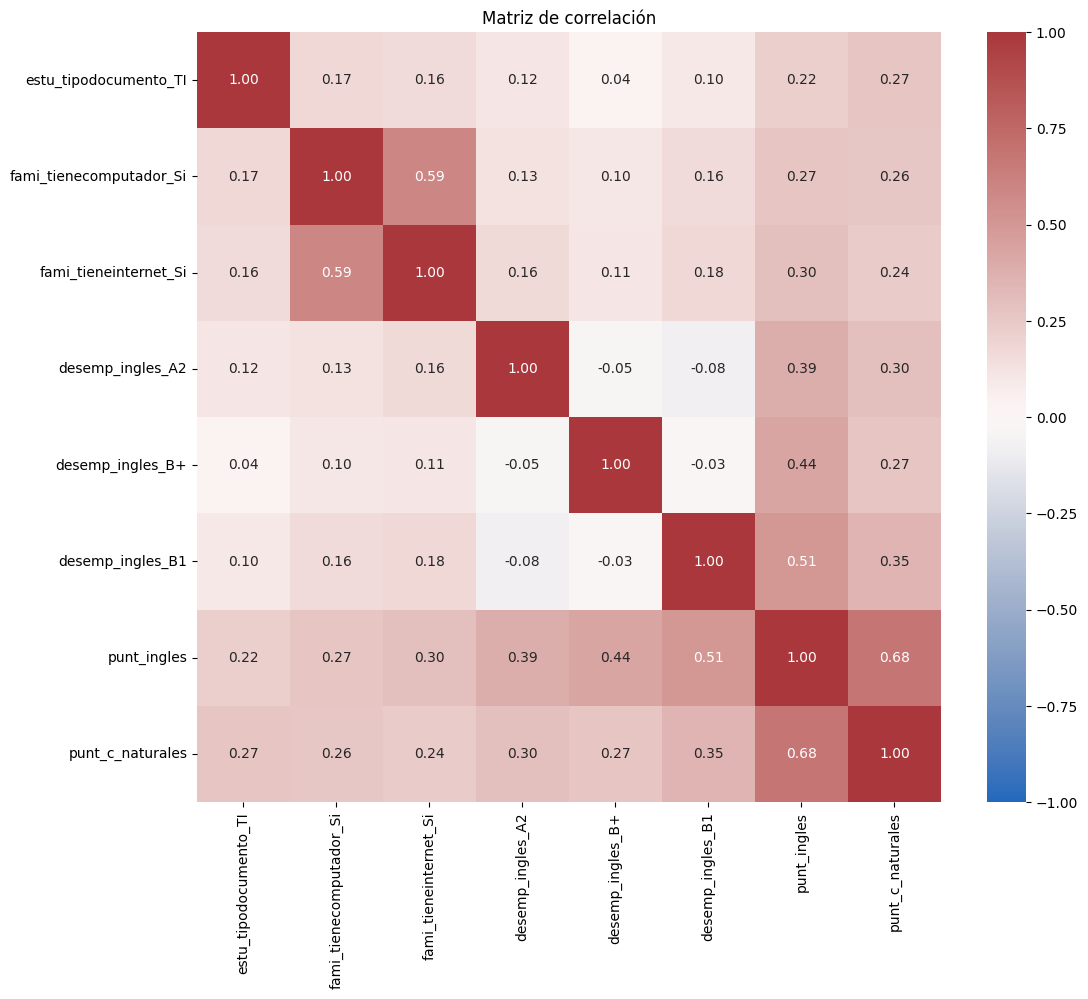

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'correlation_matrix' ya está calculada
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(
    correlation_matrix, 
    cmap='vlag',        # Paleta de colores (azul-rojo)
    annot=True,         # Mostrar los valores de las correlaciones
    fmt=".2f",          # Formato de los números
    vmin=-1, vmax=1     # Escala de la correlación (-1 a 1)
)

# Título del gráfico
plt.title("Matriz de correlación")
plt.show()

In [111]:
variable_list.append('punt_global')

# Calcular la matriz de correlación sin incluir 'estu_fechanacimiento'
correlation_matrix = df_final[variable_list].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación (sin 'estu_fechanacimiento'):")
print(correlation_matrix)

Matriz de correlación (sin 'estu_fechanacimiento'):
                         estu_tipodocumento_TI  fami_tienecomputador_Si  \
estu_tipodocumento_TI                 1.000000                 0.173263   
fami_tienecomputador_Si               0.173263                 1.000000   
fami_tieneinternet_Si                 0.160792                 0.591025   
desemp_ingles_A2                      0.115644                 0.127430   
desemp_ingles_B+                      0.037483                 0.104491   
desemp_ingles_B1                      0.098011                 0.156866   
punt_ingles                           0.221582                 0.269964   
punt_c_naturales                      0.266388                 0.258798   
punt_global                           0.285051                 0.282266   

                         fami_tieneinternet_Si  desemp_ingles_A2  \
estu_tipodocumento_TI                 0.160792          0.115644   
fami_tienecomputador_Si               0.591025          0.127

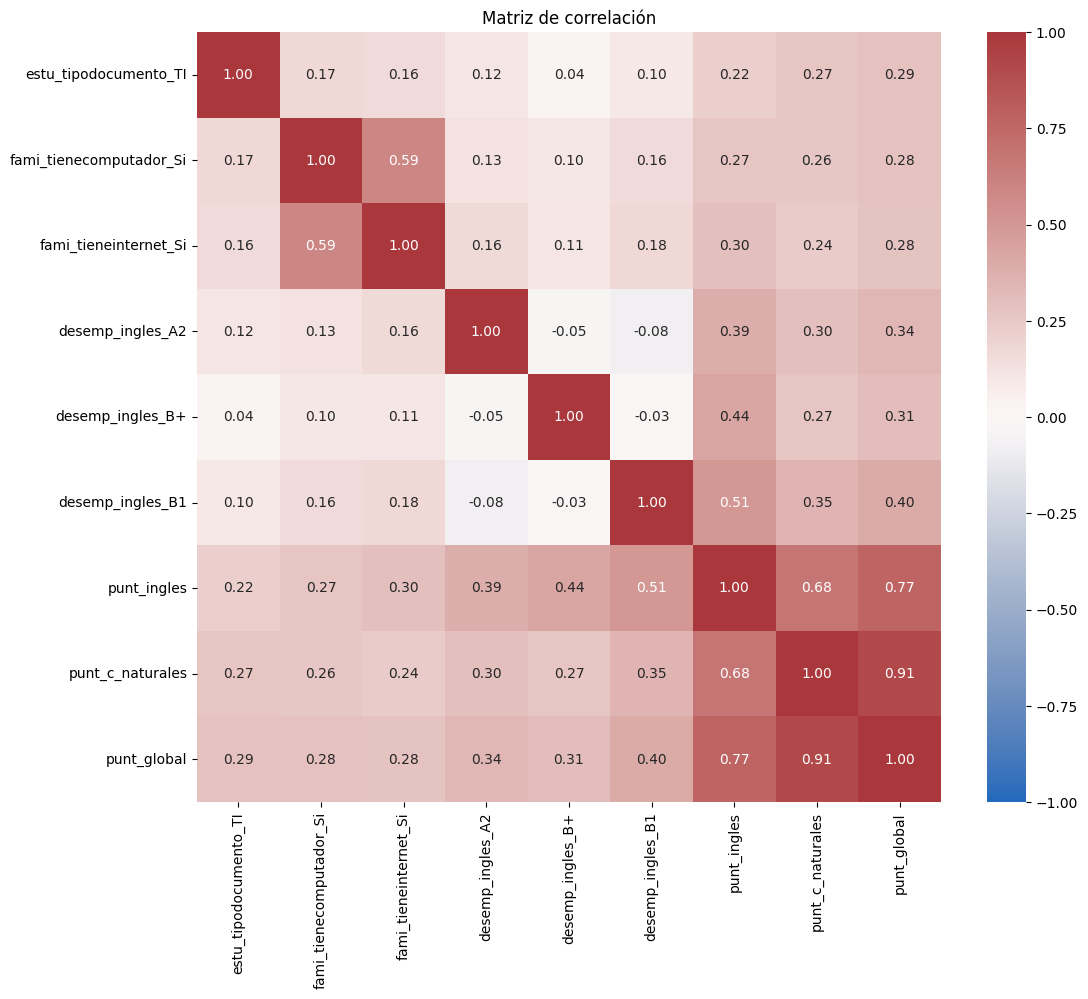

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'correlation_matrix' ya está calculada
plt.figure(figsize=(12, 10))

# Crear un mapa de calor para la matriz de correlación
sns.heatmap(
    correlation_matrix, 
    cmap='vlag',        # Paleta de colores (azul-rojo)
    annot=True,         # Mostrar los valores de las correlaciones
    fmt=".2f",          # Formato de los números
    vmin=-1, vmax=1     # Escala de la correlación (-1 a 1)
)

# Título del gráfico
plt.title("Matriz de correlación")
plt.show()